***WEB SCRAPEANJE***

Stranica o bračnom paru koji provodi mjerenje vremena za utrke još od 2009.godine. Jeff je iskusan programer softvera koji je proučavao sustave za mjerenje vremena i razvio sustave i softver za mjerenje vremena na utrkama.Heather potiče razvoj sustava, stvara i poboljšava procese te održava poslovanje organiziranim.
Koriste se jednokratnim narukvicama sa čipovima koji mjere vrijeme.

https://www.hubertiming.com/results/2021MLK

In [74]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

from urllib.request import urlopen 
from bs4 import BeautifulSoup
import re

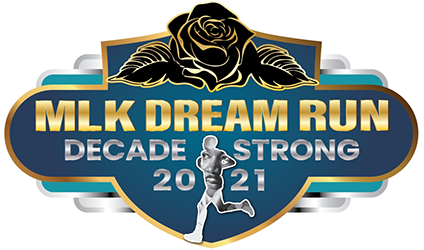

In [75]:
Image('2021MLKDreamRun.png',width=500)

In [76]:
url = "https://www.hubertiming.com/results/2021MLK"
html = urlopen(url) #otvaramo pomoću urllib.request import urlopen

In [77]:
soup = BeautifulSoup(html,"lxml") #stavljamo html da znamo sta otvaramo,
#a drugi dio lxml da znamo kakav će oblik biti

In [78]:
title = soup.title #ispisujemo "naslov" stranice
print(title) #posjeduje html tekst <title>
print(title.text)

<title>Race results for the 2021 MLK Dream Run!</title>
Race results for the 2021 MLK Dream Run!


In [79]:
links = soup.find_all('a',href=True) #dohvaćamo linkove
for link in links:
  print(link.get('href'))

https://www.nnebaportland.org/
mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2021MLK10K
/results/2021MLK15K
/results/summary/2021MLK
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [81]:
data = []
allrows = soup.find_all("tr") #tražimo svaki red na stranici
for row in allrows:
  row_list = row.find_all("td") #tražimo svaki zasebno
  dataRow = []
  for cell in row_list: #zato jer je svaka odvojene zarezom
    dataRow.append(cell.text) #u listu spremamo svaku vrijednost
  data.append(dataRow)
data=data[6:] #jer nam prva 4 reda ne trebaju
print(data)

[['1', '234', '\r\n\r\n                    IAN SMITH\r\n\r\n                ', 'M', '31', 'PORTLAND', 'OR', '17:23', '5:36', '\r\n\r\n                    1 of 63\r\n\r\n                ', 'M 21-39', '\r\n\r\n                    1 of 35\r\n\r\n                ', '1:22', '18:45'], ['2', '230', '\r\n\r\n                    ALEXA SHINDRUK\r\n\r\n                ', 'F', '24', 'BELLINGHAM', 'WA', '18:08', '5:50', '\r\n\r\n                    1 of 88\r\n\r\n                ', 'F 21-39', '\r\n\r\n                    1 of 32\r\n\r\n                ', '0:06', '18:14'], ['3', '252', '\r\n\r\n                    ANTONIO VEAUDRY CASAUS\r\n\r\n                ', 'M', '19', 'PORTLAND', 'OR', '21:24', '6:53', '\r\n\r\n                    2 of 63\r\n\r\n                ', 'M 20 and Under', '\r\n\r\n                    1 of 5\r\n\r\n                ', '0:32', '21:56'], ['4', '104', '\r\n\r\n                    LEIGH AMMON\r\n\r\n                ', 'F', '42', 'PORTLAND', 'OR', '22:06', '7:07', '\r\n\r\n 

In [82]:
df = pd.DataFrame(data) #pravimo tablicu
print(df.head()) #da se ne ispisuje cijela

  0    1   ...    12     13
0  1  234  ...  1:22  18:45
1  2  230  ...  0:06  18:14
2  3  252  ...  0:32  21:56
3  4  104  ...  0:04  22:10
4  5  725  ...  0:05  22:30

[5 rows x 14 columns]


In [83]:
df = df.replace(r'\n','',regex=True) #izbacivamo nepotrebne djelove
df = df.replace(r'\r','',regex=True)
df = df.replace(r'\t','',regex=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,234,IAN SMITH,M,31,PORTLAND,OR,17:23,5:36,1 of 63,M 21-39,1 of 35,1:22,18:45
1,2,230,ALEXA SHINDRUK ...,F,24,BELLINGHAM,WA,18:08,5:50,1 of 88,F 21-39,1 of 32,0:06,18:14
2,3,252,ANTONIO VEAUDRY CASAUS ...,M,19,PORTLAND,OR,21:24,6:53,2 of 63,M 20 and Under,1 of 5,0:32,21:56
3,4,104,LEIGH AMMON,F,42,PORTLAND,OR,22:06,7:07,2 of 88,F 40-54,1 of 31,0:04,22:10
4,5,725,BRANDON WILLIAMS ...,M,35,PORTLAND,OR,22:25,7:13,3 of 63,M 21-39,2 of 35,0:05,22:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,149,258,KATHY WARE,F,67,PORTLAND,OR,1:43:26,33:21,86 of 88,F 55+,16 of 18,0:00,1:43:26
149,150,225,WENDY SCHUMER,F,66,PORTLAND,OR,1:44:35,33:44,87 of 88,F 55+,17 of 18,0:00,1:44:35
150,151,263,PETER WILCOX,M,73,PORTLAND,OR,1:45:31,34:01,62 of 63,M 55+,11 of 11,0:00,1:45:31
151,152,175,NANCY KELLY,F,68,PORTLAND,OR,1:45:54,34:09,88 of 88,F 55+,18 of 18,0:00,1:45:54


In [84]:
header_list = [] #naslovi stupaca
col_headers = soup.find_all('th')
for col in col_headers:
  header_list.append(col.text)
print(header_list)

['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Time', 'Chip Pace', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


In [85]:
df.columns=header_list #na tablicu dodajemo naslove stupaca
print(df.head())

  Place  Bib  ... Time to Start Gun Time
0     1  234  ...          1:22    18:45
1     2  230  ...          0:06    18:14
2     3  252  ...          0:32    21:56
3     4  104  ...          0:04    22:10
4     5  725  ...          0:05    22:30

[5 rows x 14 columns]


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Place            153 non-null    object
 1   Bib              153 non-null    object
 2   Name             153 non-null    object
 3   Gender           153 non-null    object
 4   Age              153 non-null    object
 5   City             153 non-null    object
 6   State            153 non-null    object
 7   Chip Time        153 non-null    object
 8   Chip Pace        153 non-null    object
 9   Gender Place     153 non-null    object
 10  Age Group        153 non-null    object
 11  Age Group Place  153 non-null    object
 12  Time to Start    153 non-null    object
 13  Gun Time         153 non-null    object
dtypes: object(14)
memory usage: 16.9+ KB


In [88]:
df.shape

(153, 14)

In [89]:
from google.colab import files
df.to_csv('hubertiming.csv') 
files.download('hubertiming.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>